In [52]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt 

In [3]:
df =pd.read_excel("Height-Width.xlsx")

# Data Analysis

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [6]:
df.head(15)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [7]:
df[5:15]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926
11,71.640805,213.741170
12,64.766329,167.127461
13,69.283070,189.446181
14,69.243732,186.434168


In [8]:
df['Height'].head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [9]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [10]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [11]:
df.Height.mean()

69.02441087268781

In [12]:
df.Weight[5:11]

5     152.212156
6     183.927889
7     167.971111
8     175.929440
9     156.399676
10    186.604926
Name: Weight, dtype: float64

In [13]:
df.shape

(3501, 2)

In [14]:
row,col = df.shape

In [15]:
row

3501

In [16]:
col

2

In [17]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [18]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [19]:
df.Weight.describe()

count    3501.000000
mean      186.891258
std        19.903132
min        65.780000
25%       173.896237
50%       187.308370
75%       200.356448
max       269.989698
Name: Weight, dtype: float64

# Data Visualization

Text(0.5, 1.0, 'Rent plot')

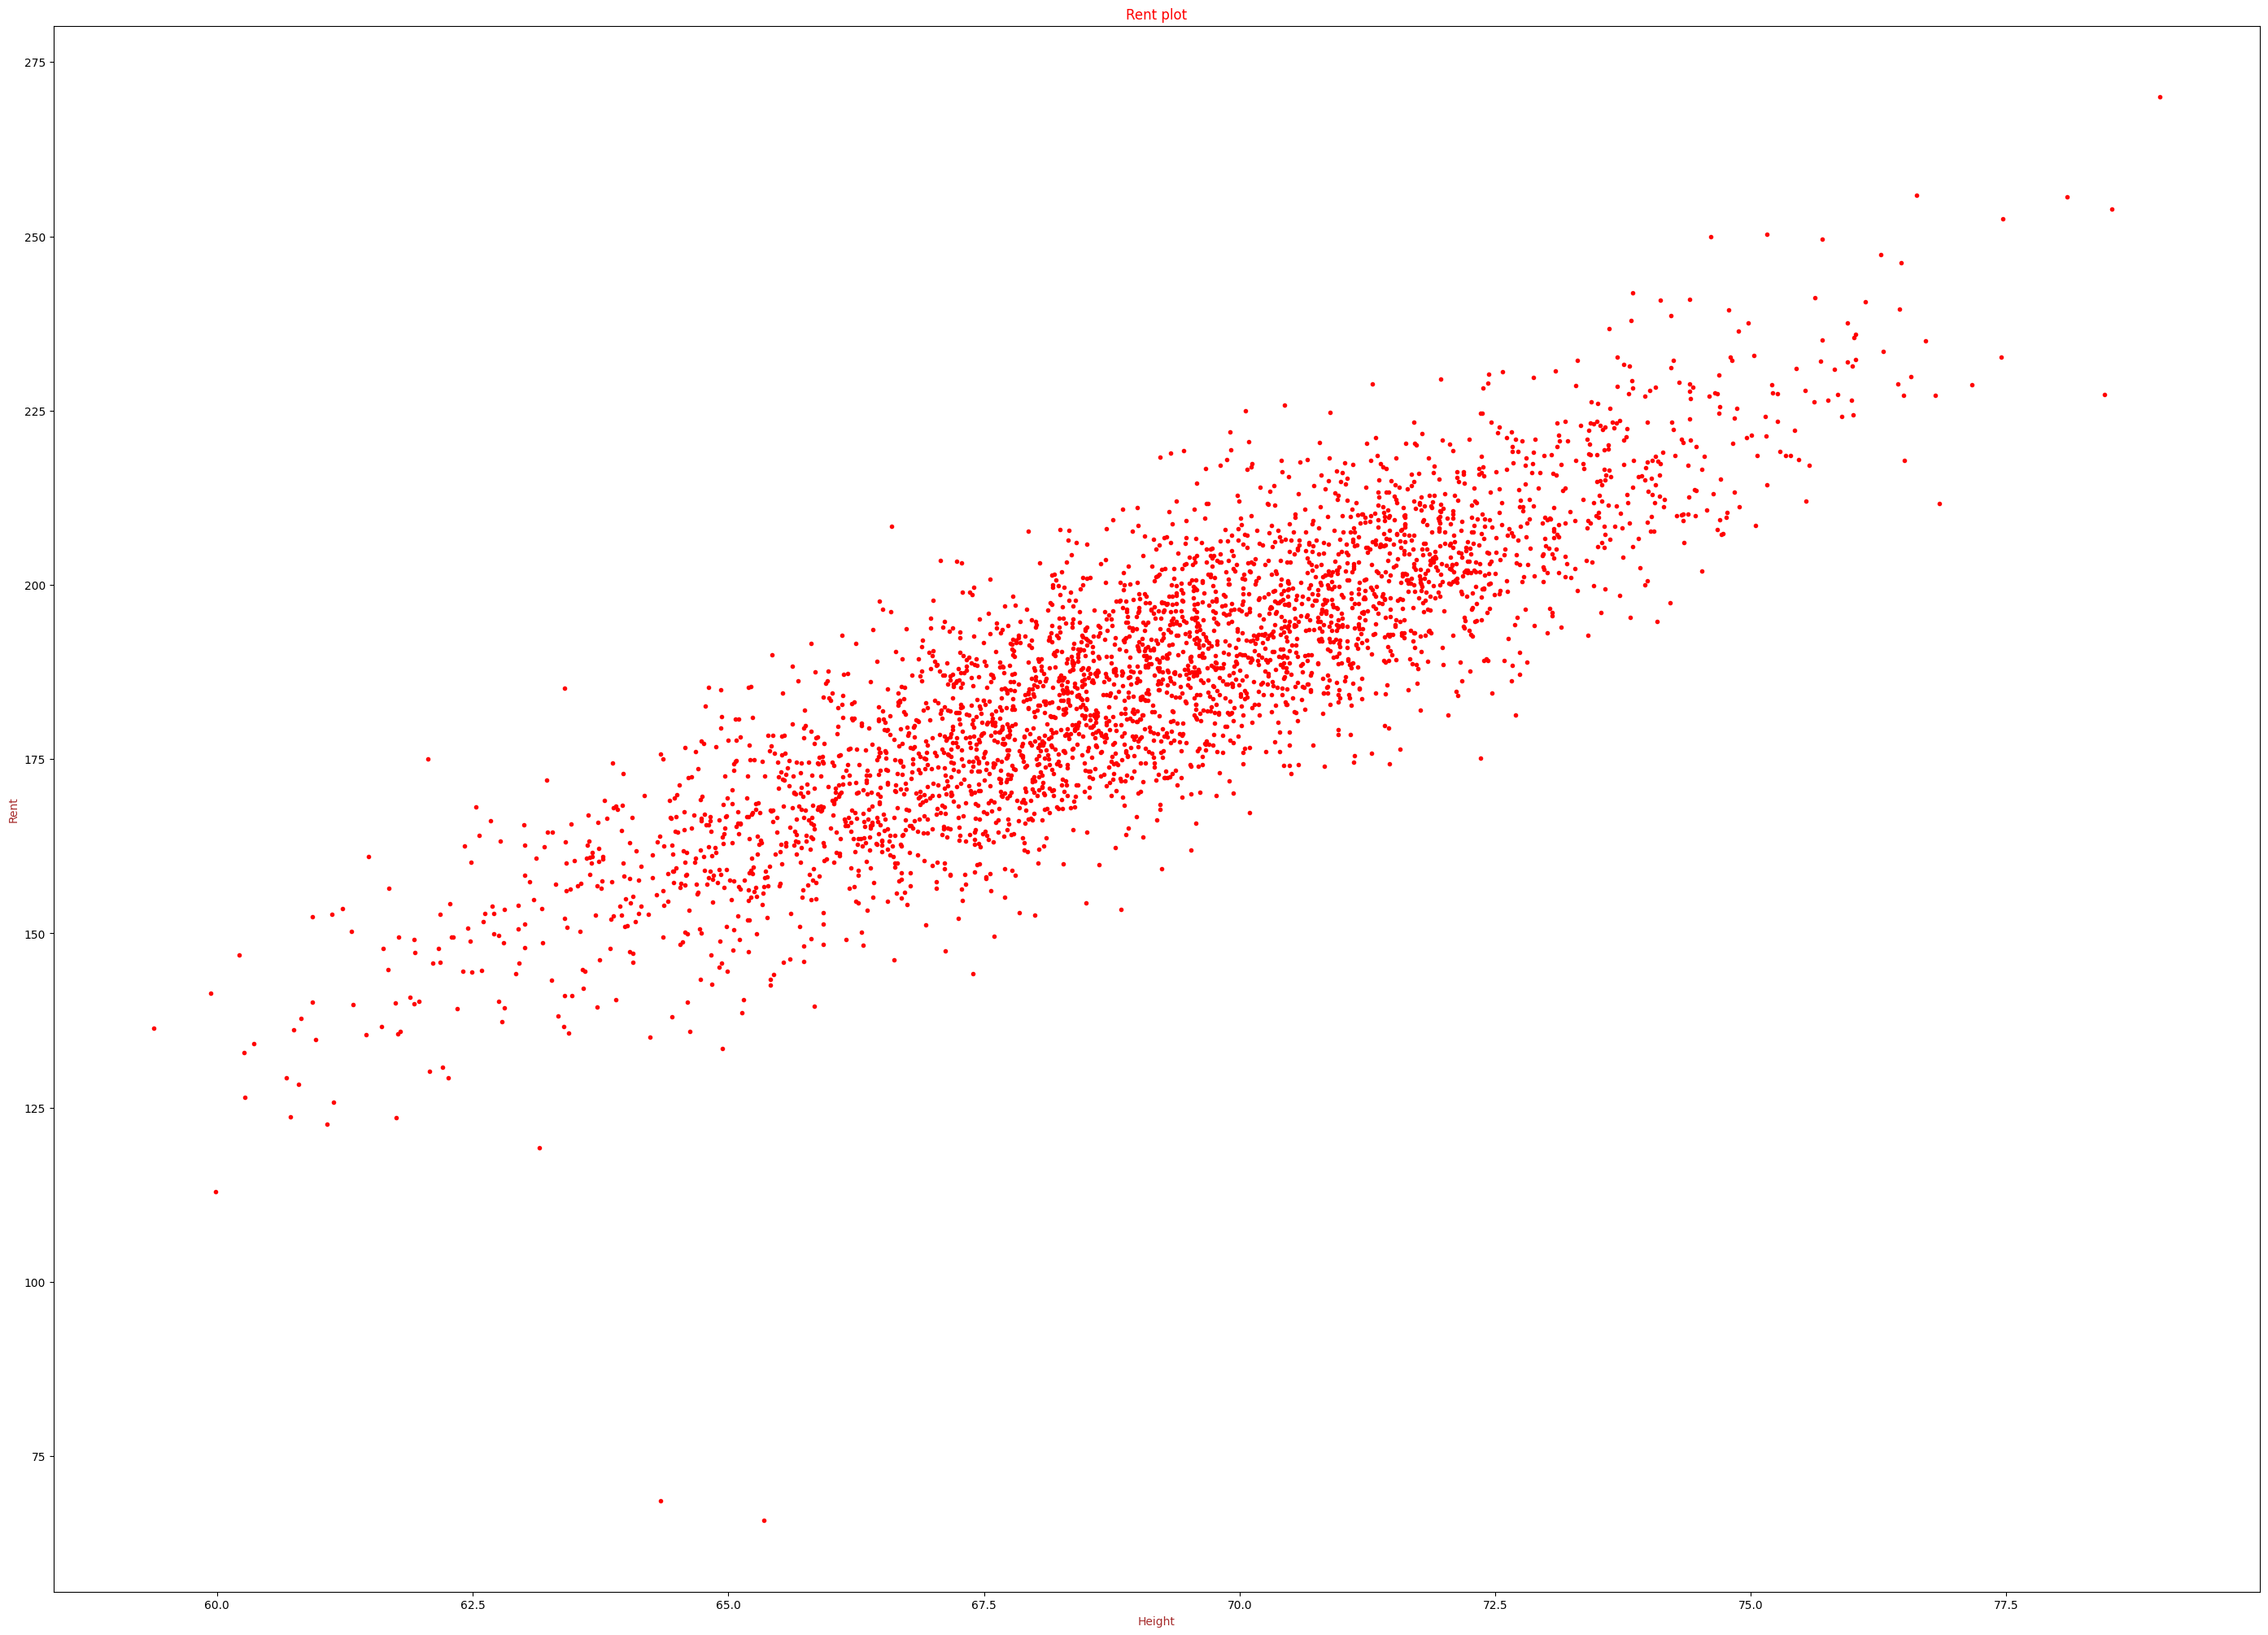

In [20]:
plt.figure(figsize=(35,25))
plt.scatter(df.Height,df.Weight,marker =".",color ="red")
plt.xlabel("Height",color="brown")
plt.ylabel("Rent",color="brown")
plt.title("Rent plot",color ="red")

# X and Y Variable Create

In [21]:
x = df[['Height']]

In [22]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [23]:
y= df[['Weight']]

In [24]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split as tts

In [35]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3 , random_state = 5)

In [36]:
xtrain.head()

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258


In [37]:
ytrain.head()

,Weight
3466,181.886241
828,160.147436
2234,165.313807
3245,168.618676
1298,177.149091


In [38]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [39]:
ytest.head()

,Weight
2730,167.842391
2008,193.601091
840,196.763907
2635,208.204435
1721,191.683842


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression()

In [43]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [44]:
m = reg.coef_

In [45]:
m

array([[6.00809929]])

In [46]:
c= reg.intercept_

In [47]:
c

array([-227.77595602])

In [48]:
y = m*1500 + c

In [49]:
y

array([[8784.37297161]])

In [53]:
reg.predict([[1500]])

array([[8784.37297161]])

In [54]:
df["Predicted Result"] = reg.predict(x)

In [55]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


# MSE and MAE

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
pred = reg.predict(xtest)

In [58]:
pred

array([[156.22895255],
       [171.26045447],
       [186.87942774],
       ...,
       [205.60020285],
       [186.14253731],
       [219.24585226]])

In [59]:
mse =mean_squared_error(xtest,pred)

In [60]:
mse

14074.602534586227

In [61]:
mae = mean_absolute_error(ytest,pred)

In [62]:
mae

8.061150778858023

# Best Fit Line

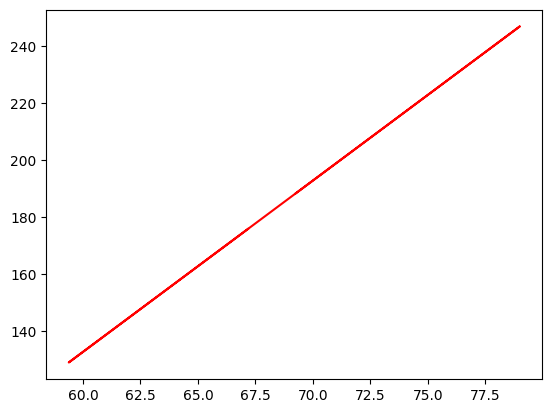

In [63]:
plt.plot(xtrain,reg.predict(xtrain),color ="red")

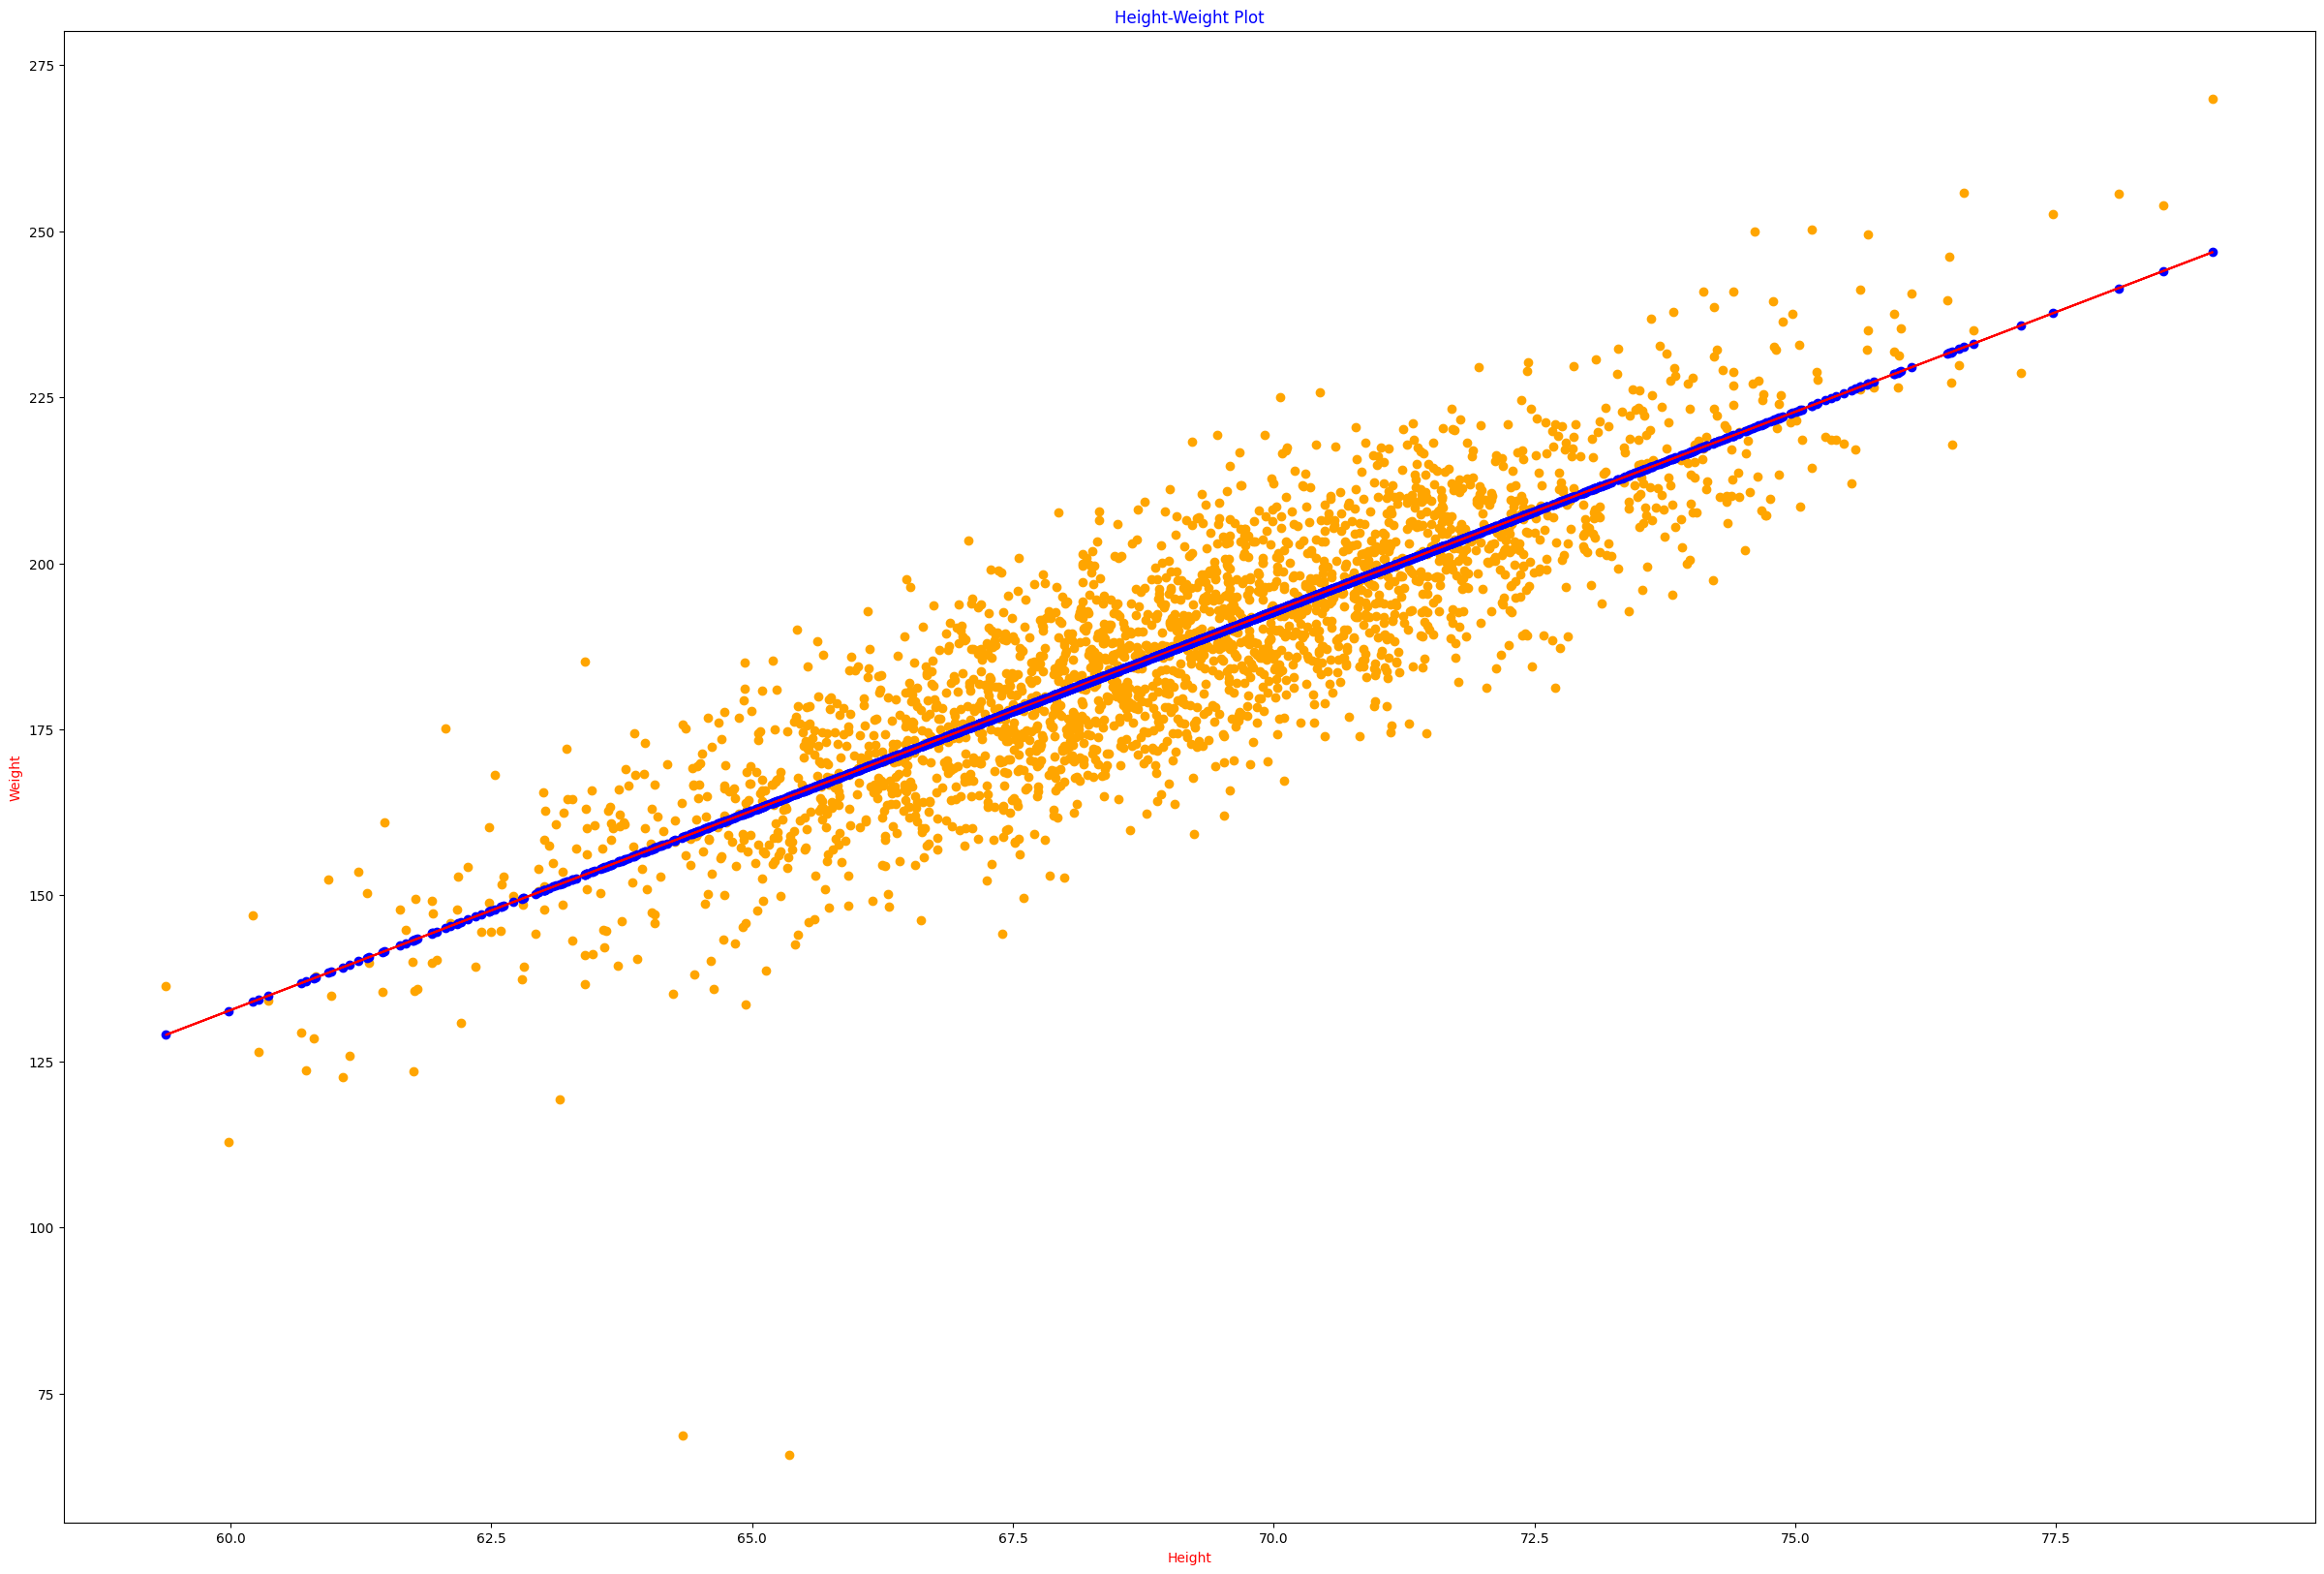

In [90]:
plt.figure(figsize=(30,20))
plt.xlabel("Height",color ="red")
plt.ylabel("Weight",color = "red")
plt.title("Height-Weight Plot",color="blue")
plt.scatter(xtrain,ytrain,color ="orange")
plt.plot(xtrain,reg.predict(xtrain),color = "red")
plt.scatter(xtrain,reg.predict(xtrain),color ="blue")

# Accuracy

In [91]:
from sklearn.metrics import r2_score

In [93]:
r2_score(ytest,pred)

0.7302328605746943

# New Data Set

In [94]:
xtest.to_csv("xtest.csv")

In [95]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [96]:
len(xtest)

1051

# Save Model

In [98]:
import pickle as pk

In [99]:
import joblib as jb

In [100]:
pk.dump(reg,open("HeightWeightModel","wb"))

In [101]:
reg2 =pk.load(open("HeightWeightModel","rb"))

In [102]:
reg2.predict([[2000]])

array([[11788.42261415]])

In [103]:
jb.dump(reg,"HeightWeightModel_2")

['HeightWeightModel_2']